In [20]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('C:\\Users\\Minh Chi\\Downloads\\data.csv')

In [4]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [9]:
df.shape

(569, 33)

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
y = df.diagnosis
list = ['id', 'Unnamed: 32', 'diagnosis']
X = df.drop(list, axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
#CHIA DỮ LIỆU 80% TRAIN, 20% TEST
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# 3. Chọn k feature tốt nhất (chi2)
selector = SelectKBest(score_func=chi2, k=15)
selector.fit(X_train, y_train) #mục đích để chọn điểm 5 biến cao nhât

# 4. Tạo DataFrame hiển thị điểm và sắp xếp
df_scores = pd.DataFrame({
    'feature': X_train.columns,
    'chi2_score': selector.scores_
}).sort_values(by='chi2_score', ascending=False) # sort_values(cột, tăng hay giảm)

print("=== Chi2 scores for all features ===")
print(df_scores)


=== Chi2 scores for all features ===
                    feature    chi2_score
23               area_worst  75021.734079
3                 area_mean  36689.955660
13                  area_se   6127.410670
22          perimeter_worst   2405.128351
2            perimeter_mean   1340.610924
20             radius_worst    325.782599
0               radius_mean    177.946492
12             perimeter_se    172.696840
21            texture_worst    116.958562
1              texture_mean     60.691643
26          concavity_worst     25.885812
10                radius_se     24.588297
6            concavity_mean     13.054765
25        compactness_worst     11.907758
27     concave points_worst      8.907510
7       concave points_mean      7.097665
5          compactness_mean      3.418395
28           symmetry_worst      1.006351
16             concavity_se      0.692897
15           compactness_se      0.374072
24         smoothness_worst      0.263226
17        concave points_se      0.2015

In [ ]:
#chọn k tốt nhất bằng RFE (recursive feature elimination)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#mô hình lựa chọn thuộc tính bằng RFS
model = RandomForestClassifier(random_state=42)

#khởi tạo 10 đặc trưng
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Lấy danh sách cột được chọn
rfe_selected_features = X_train.columns[rfe.support_]
print("RFE chọn các đặc trưng sau: ", list(rfe_selected_features))

In [ ]:
#chọn k tốt nhất bằng PCA (principal componet analysis)

# nên chuẩn hóa khi bắt đầu chọn thuộc tính
from sklearn.decomposition import PCA
# Khởi tạo PCA, chọn số thành phần (component)
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_train)

# Hiển thị tỷ lệ phương sai giữ lại
print("🔍 Tỷ lệ phương sai mỗi thành phần PCA:")
print(pca.explained_variance_ratio_)
print("🎯 Tổng phương sai giữ lại:", sum(pca.explained_variance_ratio_))
# PCA không giữ tên cột gốc → dùng cho giảm chiều, không dùng để diễn giải thuộc tính nào là quan trọng

In [ ]:
## feature importance (ramdom forest)
# Huấn luyện Random Forest để lấy feature importance

rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_train, y_train)

#tính độ quan trọng
importance = rf_temp.feature_importances_
feature_df = pd.DataFrame({
    'feature', X_train.columns,
    'importance', importance
}).sort_values(by= 'importance', ascending=False);

top_features = feature_df['Feature'].head(15).values
print("🎯 Top đặc trưng chọn ra:\n", top_features)

# Bước 3: Tạo lại tập dữ liệu chỉ chứa các đặc trưng được chọn
X_train_sel = X_train[top_features]
X_test_sel = X_test[top_features]

In [ ]:
# Tiến hành huấn luyện mô hình ramdomforest
# Huấn luyện Random Forest chính thức
clf_rf_final = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators: xác định số cậy quyết định  trong mô hình
clf_rf_final.fit(X_train_sel, y_train)

# Dự đoán và đánh giá
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = clf_rf_final.predict(X_test_sel)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy is:  0.9649122807017544


<Axes: >

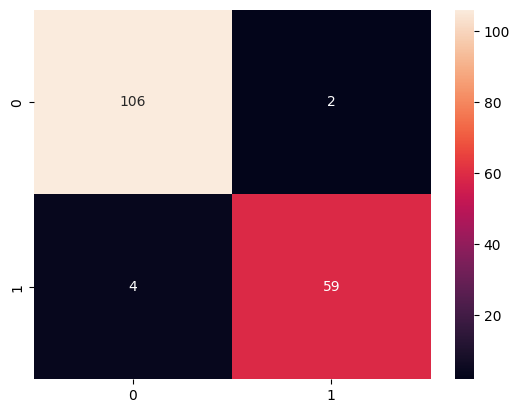

In [24]:
#lựa chọn thuộc tính dựa vào ramdomfores
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
clf_rf = RandomForestClassifier(random_state=43)
clf_rf = clf_rf.fit(X_train, y_train) #B, M
ac = accuracy_score(y_test, clf_rf.predict(X_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
dựa vào sơ đồ ta tính ra đc 
cm[0,0] = 106: dự đoán B, thật sự B (True Negative)

cm[0,1] = 2: dự đoán M, thật sự B (False Positive cho class M)

cm[1,0] = 4: dự đoán B, thật sự M (False Negative cho class M)

cm[1,1] = 59: dự đoán M, thật sự M (True Positive)

precision: TP / (TP + FP)
matric: TP / (TP + FN)


In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=clf_rf, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

Top 5 trong 15 feature RFE: ['concave points_worst', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_mean']


In [ ]:
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


In [30]:
data_feater = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst']
X_ = df[data_feater]
X_.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
0,17.99,10.38,122.80,1001.0,0.3001,0.14710,153.40,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654
1,20.57,17.77,132.90,1326.0,0.0869,0.07017,74.08,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860
2,19.69,21.25,130.00,1203.0,0.1974,0.12790,94.03,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430
3,11.42,20.38,77.58,386.1,0.2414,0.10520,27.23,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575
4,20.29,14.34,135.10,1297.0,0.1980,0.10430,94.44,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2,  random_state=42)


In [ ]:
#tạo cậy
#thư viện tạo ra cây quyết định
from sklearn import tree
decition_tree = tree.DecisionTreeClassifier(criterion='gini')
decition_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
target = df['diagnosis'].unique()
target


array(['M', 'B'], dtype=object)

In [34]:
from sklearn import datasets
from IPython.display import Image
import pydotplus

# create dot data
dot_data = tree.export_graphviz(decition_tree, out_file=None,
                                feature_names=data_feater,
                                class_names=target)

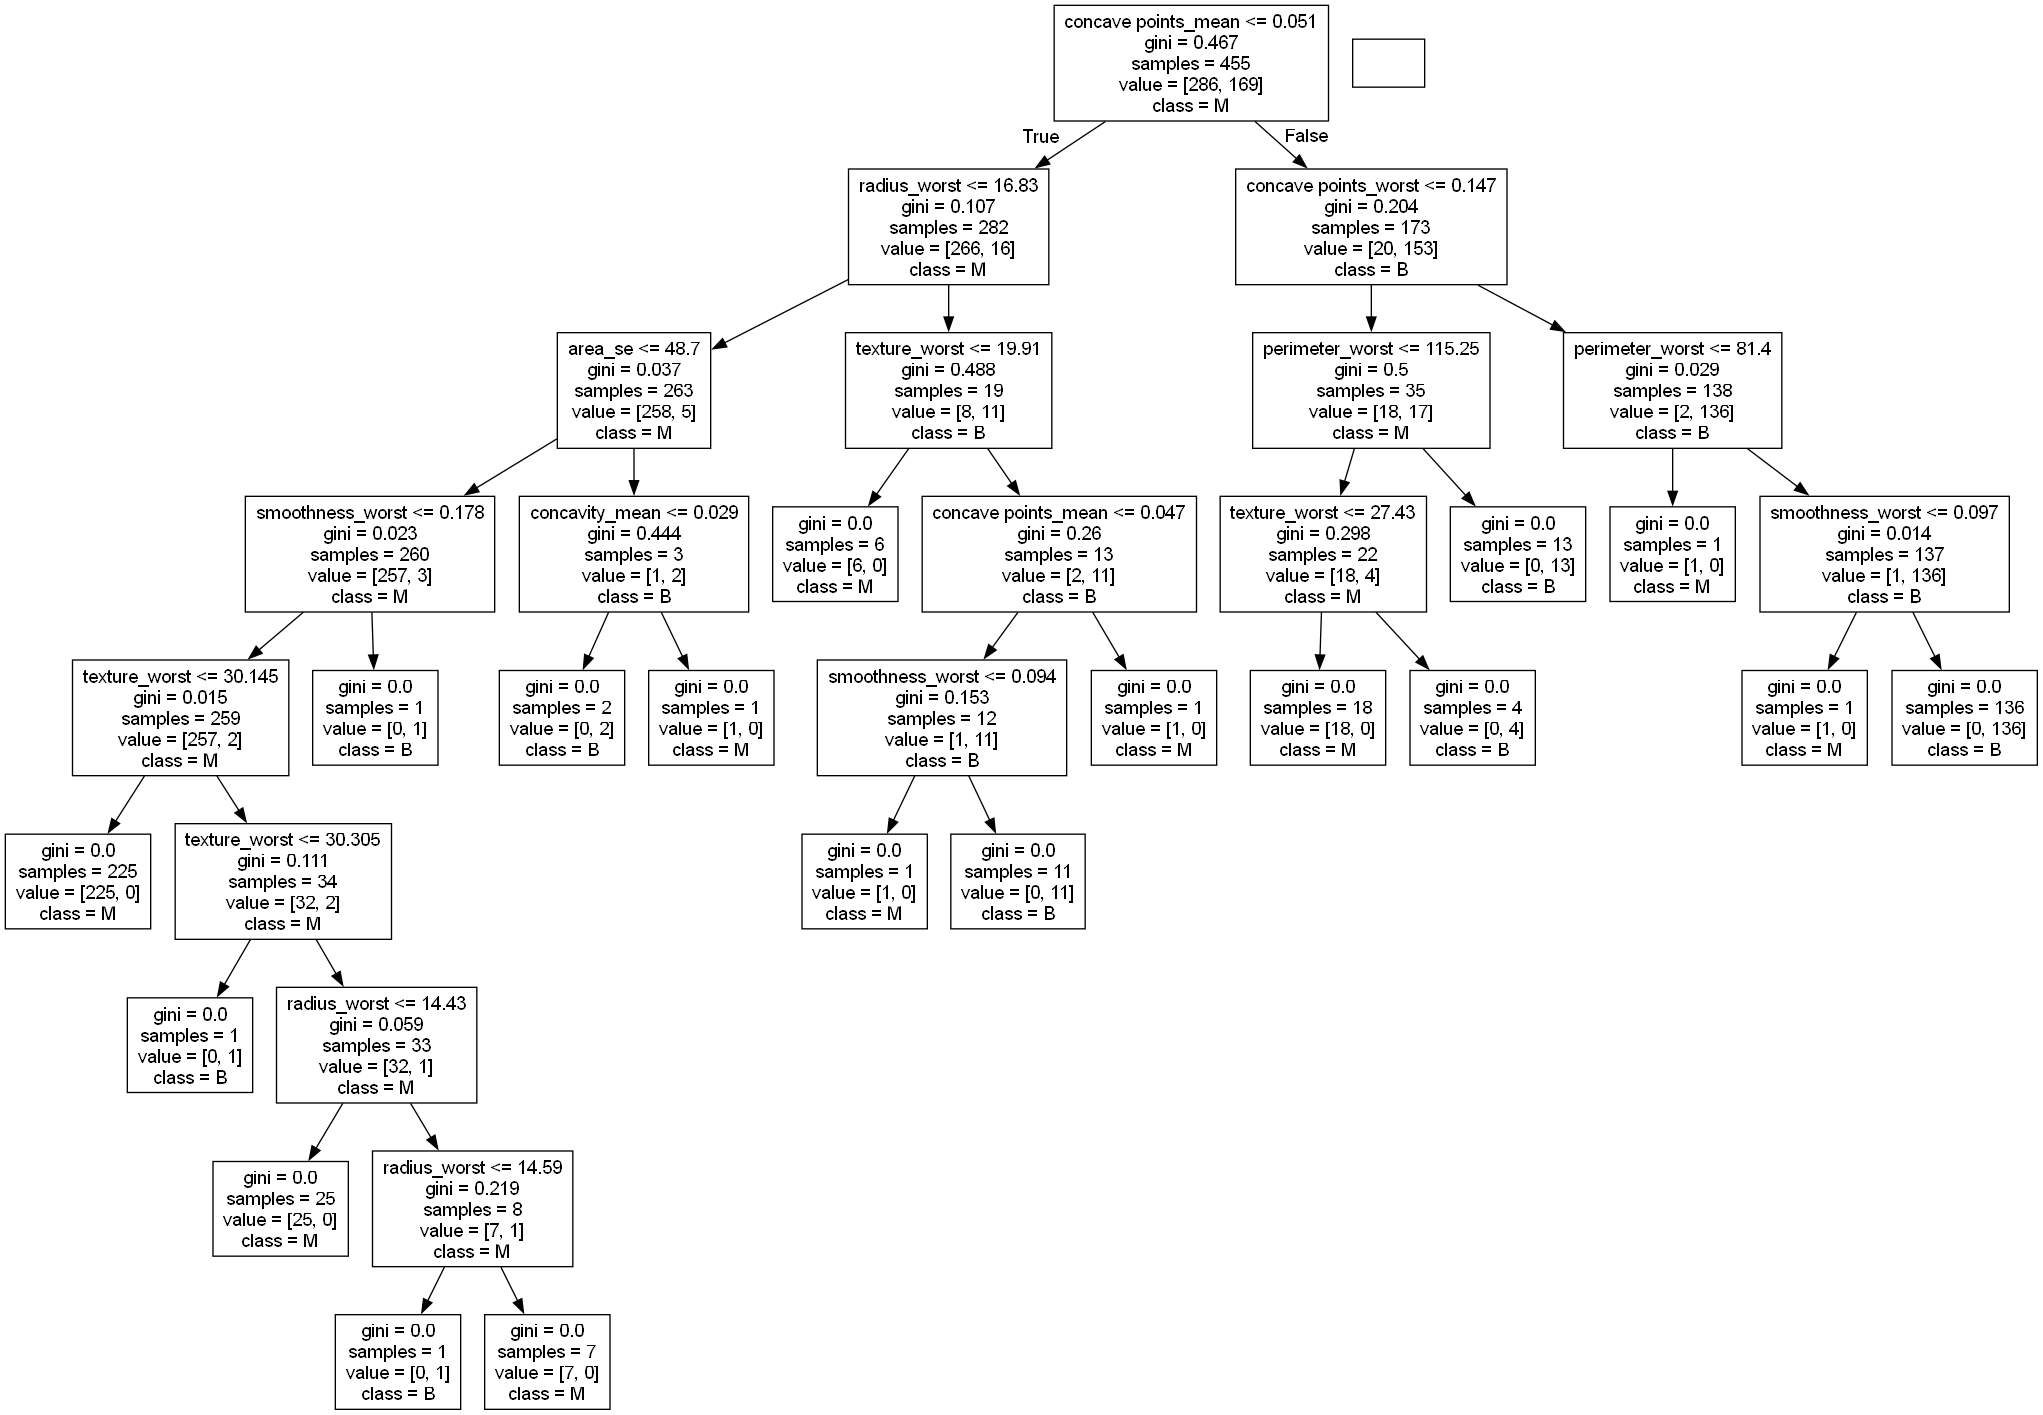

In [35]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [36]:
#Dùng mô hình đã huấn luyện (decition_tree) để sinh nhãn dự đoán cho mỗi hàng trong X_test.
predictions = decition_tree.predict(X_test)
#So sánh nhãn thật (y_test) với nhãn dự đoán (predictions) để xem tỉ lệ đúng tổng thể.
print(accuracy_score(y_test, predictions))
#Ma trận thể hiện số lượng thật–đúng cho từng cặp (nhãn thật, nhãn dự đoán), giúp bạn thấy rõ mô hình “nhầm lẫn” với lớp nào.
print(confusion_matrix(y_test, predictions))
#– Báo cáo chi tiết precision/recall/F1-score cho từng lớp.
print(classification_report(y_test, predictions))

0.9210526315789473
[[67  4]
 [ 5 38]]
              precision    recall  f1-score   support

           B       0.93      0.94      0.94        71
           M       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
[67  4]   → B: 67 đúng, 4 bị nhầm thành M
 [ 5 38]  → M: 38 đúng, 5 bị nhầm thành B


In [38]:
#so sánh mô hình trước và sau khi chọn thuộc tính
X_full = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y_full = df['diagnosis']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full, y_full, test_size=0.3, random_state=42) 

In [39]:
from sklearn.tree import DecisionTreeClassifier
## Train mô hình với toàn bộ thuộc tính
tree_full = DecisionTreeClassifier(random_state=42)
tree_full.fit(X_train_f, y_train_f)

DecisionTreeClassifier(random_state=42)

In [ ]:
#dự đoán và đánh giá
y_pred_full = tree_full.predict(X_test_f)
print("Accuracy:", accuracy_score(y_test_f, y_pred_full))
print(confusion_matrix(y_test_f, y_pred_full))
print(classification_report(y_test_f, y_pred_full))


🎯 Accuracy trước khi chọn thuộc tính: 0.9415204678362573
[[101   7]
 [  3  60]]
              precision    recall  f1-score   support

           B       0.97      0.94      0.95       108
           M       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



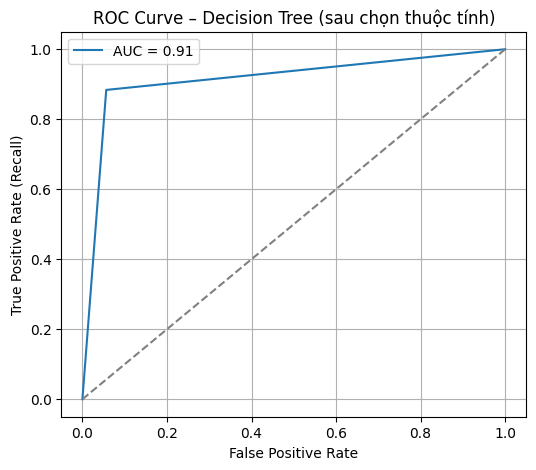

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Dự đoán xác suất với mô hình sau khi chọn thuộc tính
y_test_bin = y_test.map({'B': 0, 'M': 1})  # Chuyển sang 0/1 để vẽ ROC
y_score = decition_tree.predict_proba(X_test)[:, 1]  # X_test là tập test đã chọn 15 feature

fpr, tpr, _ = roc_curve(y_test_bin, y_score)
auc = roc_auc_score(y_test_bin, y_score)

# plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – Decision Tree (sau chọn thuộc tính)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
Trục X: False Positive Rate (FPR)
→ tỷ lệ mẫu "lành tính" (B) bị đoán nhầm là ung thư (M)

Trục Y: True Positive Rate (Recall)
→ tỷ lệ mẫu "ung thư" (M) được đoán đúng là M

AUC = 0.91 tức là:

Mô hình có 91% khả năng phân biệt đúng giữa bệnh (M) và lành (B) ở mọi mức ngưỡng dự đoán.

Đường cong của bạn bám rất sát trục trái và đỉnh, điều này rất tốt → cho thấy mô hình ít đoán sai mẫu lành tính thành bệnh, và bắt đúng phần lớn mẫu bệnh.

Đường chéo xám là "đoán ngẫu nhiên" (AUC = 0.5). Mô hình của bạn vượt xa đường này → hiệu quả rõ rệt.